The loss value printed in the log is the current step, and the metric is the average value of previous steps.
Epoch 1/5
step 938/938 [==============================] - loss: 0.0437 - acc: 0.9361 - 17ms/step          
Epoch 2/5
step 938/938 [==============================] - loss: 0.0359 - acc: 0.9771 - 17ms/step          
Epoch 3/5
step 938/938 [==============================] - loss: 0.0212 - acc: 0.9819 - 17ms/step          
Epoch 4/5
step 938/938 [==============================] - loss: 8.9452e-04 - acc: 0.9841 - 17ms/step      
Epoch 5/5
step 938/938 [==============================] - loss: 0.0340 - acc: 0.9861 - 17ms/step          
Eval begin...
step 157/157 [==============================] - loss: 7.1087e-04 - acc: 0.9807 - 6ms/step         
Eval samples: 10000
true label: 7, pred label: 7


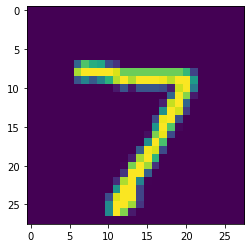

In [1]:
import paddle
import numpy as np
from paddle.vision.transforms import Normalize
from matplotlib import pyplot as plt

# 当出现matplotlib 无法启动的时候启用本语句
# import os
# os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

transform = Normalize(mean=[127.5], std=[127.5], data_format='CHW')
# 下载数据集并初始化 DataSet
train_dataset = paddle.vision.datasets.MNIST(mode='train', transform=transform)
test_dataset = paddle.vision.datasets.MNIST(mode='test', transform=transform)

# 模型组网并初始化网络
lenet = paddle.vision.models.LeNet(num_classes=10)
model = paddle.Model(lenet)

# 模型训练的配置准备，准备损失函数，优化器和评价指标
model.prepare(paddle.optimizer.Adam(parameters=model.parameters()), 
              paddle.nn.CrossEntropyLoss(),
              paddle.metric.Accuracy())

# 模型训练
model.fit(train_dataset, epochs=5, batch_size=64, verbose=1)
# 模型评估
model.evaluate(test_dataset, batch_size=64, verbose=1)

# 保存模型
model.save('./output/mnist')
# 加载模型
model.load('output/mnist')

# 从测试集中取出一张图片
img, label = test_dataset[0]
# 将图片shape从1*28*28变为1*1*28*28，增加一个batch维度，以匹配模型输入格式要求
img_batch = np.expand_dims(img.astype('float32'), axis=0)

# 执行推理并打印结果，此处predict_batch返回的是一个list，取出其中数据获得预测结果
out = model.predict_batch(img_batch)[0]
pred_label = out.argmax()
print('true label: {}, pred label: {}'.format(label[0], pred_label))
# 可视化图片

plt.imshow(img[0])
